In [36]:
import os, shutil
first_dataset_dir = '../datasets/train1'
second_dataset_dir = '../datasets/train2'
third_dataset_dir = '../datasets/train3'
fourth_dataset_dir = '../datasets/train4'
fifth_dataset_dir = '../datasets/train5'
test_dataset_dir = '../datasets/test'

In [37]:
from keras.utils import image_dataset_from_directory
IMG_SIZE = 32

train_ds1 = image_dataset_from_directory(first_dataset_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32, label_mode='categorical')
# 6 % 5 + 1 = 2
val_ds2 = image_dataset_from_directory(second_dataset_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32, label_mode='categorical')
train_ds3 = image_dataset_from_directory(third_dataset_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32, label_mode='categorical')
train_ds4 = image_dataset_from_directory(fourth_dataset_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32, label_mode='categorical')
train_ds5 = image_dataset_from_directory(fifth_dataset_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32, label_mode='categorical')
test_ds = image_dataset_from_directory(test_dataset_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=32, label_mode='categorical')

Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.


In [38]:
print (type(train_ds1))
print (train_ds1.class_names)

full_train_ds = train_ds1.concatenate(train_ds3).concatenate(train_ds4).concatenate(train_ds5)

# Even if we switch datatypes back to the original
# Methods like class_names are not available
# So we keep it as "concatenated dataset" instead of "prefetch dataset"
# full_train_ds = full_train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
# print (full_train_ds.class_names)
print (type(full_train_ds))

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
['000_airplane', '001_automobile', '002_bird', '003_cat', '004_deer', '005_dog', '006_frog', '007_horse', '008_ship', '009_truck']
<class 'tensorflow.python.data.ops.concatenate_op._ConcatenateDataset'>


In [39]:
for data_batch, labels_batch in full_train_ds:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 32, 32, 3)
labels batch shape: (32, 10)


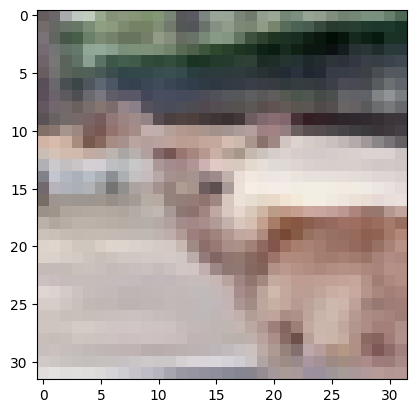

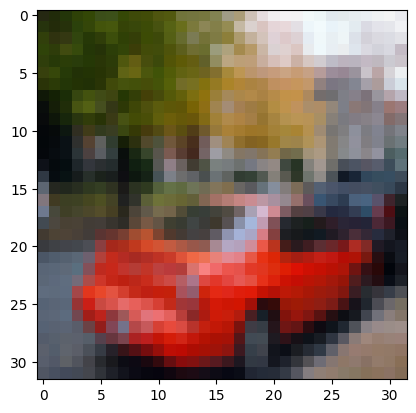

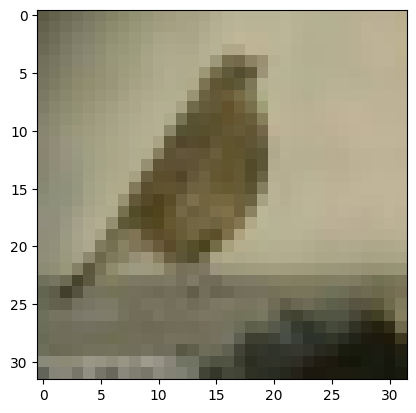

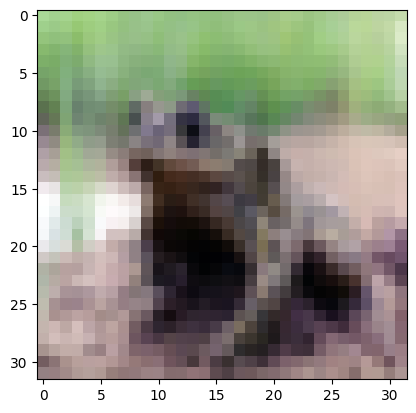

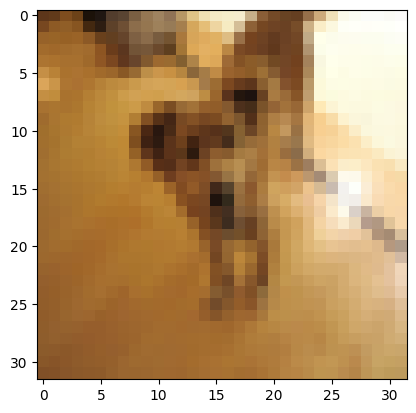

In [40]:
import matplotlib.pyplot as plt
for data_batch, _ in full_train_ds.take(1):
  for i in range(5):
    plt.imshow(data_batch[i].numpy().astype("uint8"))
    plt.show()

In [42]:
from tensorflow import keras
from keras import layers
from keras import models
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
#image size too sort to add another layer
#x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
#x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
outputs = layers.Dense(10, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [43]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 rescaling_6 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 conv2d_24 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                       

In [44]:
import tensorflow as tf
model.compile(loss='categorical_crossentropy', 
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4), 
              metrics=['acc'])


In [45]:
history = model.fit(full_train_ds, 
                    epochs=30, 
                    validation_data=val_ds2)

Epoch 1/30
1252/1252 [==============================] - 10s 8ms/step - loss: 1.9179 - acc: 0.2966 - val_loss: 1.7086 - val_acc: 0.3850
Epoch 2/30
1252/1252 [==============================] - 10s 8ms/step - loss: 1.6018 - acc: 0.4171 - val_loss: 1.5288 - val_acc: 0.4506
Epoch 3/30
1252/1252 [==============================] - 10s 8ms/step - loss: 1.4685 - acc: 0.4697 - val_loss: 1.4534 - val_acc: 0.4717
Epoch 4/30
1252/1252 [==============================] - 11s 8ms/step - loss: 1.3746 - acc: 0.5056 - val_loss: 1.3789 - val_acc: 0.5091
Epoch 5/30
1252/1252 [==============================] - 11s 9ms/step - loss: 1.2955 - acc: 0.5400 - val_loss: 1.3080 - val_acc: 0.5350
Epoch 6/30
1252/1252 [==============================] - 11s 9ms/step - loss: 1.2325 - acc: 0.5652 - val_loss: 1.2365 - val_acc: 0.5613
Epoch 7/30
1252/1252 [==============================] - 11s 9ms/step - loss: 1.1795 - acc: 0.5860 - val_loss: 1.2189 - val_acc: 0.5677
Epoch 8/30
1252/1252 [==============================] -